# Problem

#### This survey was conducted on 1525 voters with 9 variables.A  model is built  to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Upload Required Libraries

In [12]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn import preprocessing

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#import visualisation library
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


### Importing data

In [13]:
df=pd.read_excel("Election_Data.xlsx")

In [14]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


## EDA

In [15]:
# Dropping the first column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [16]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


## Data Dictionary

In [17]:
data_dict=pd.read_excel("Election_data_dictionary.xlsx")
data_dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


## Inspect Dataframes

In [18]:
#dataset dimension
print(" Dataset dimension :",df.shape)

#dataset size
print(" Size of the dataset :",df.size)

 Dataset dimension : (1525, 9)
 Size of the dataset : 13725


In [19]:
#check datatype of variables
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [20]:
#check null values
df.isna().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [21]:
#check missing values
df.isnull().any()

vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [22]:
#check duplicates in the dataset if any
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [23]:
#drop duplicate rows
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


In [24]:
#checking duplicates after dropping
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## <span style='color:Green'>Key Observations </span>

- The dataset consists of 1525 rows and 9 columns.
- There are 7 columns of an 'integer' type and only two of an 'object' type.
- No null values found in the dataset.
- 8 duplicate rows were found here and it has been deleted. 
- The dataset now contains 1517 entries.

### Unique values for categorical variables

In [91]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




## <span style='color:Green'>Key Observations </span>

- Categorical column 'VOTE' has two parties name in it,namely 'conservative'  and 'Labour'.
- Out of 1517 voters 460 have voted for 'Conservative' party and rest 1063 voted for 'Labour' party.
- There are 709 male voters and 808 female voters under 'Gender' category.
- Most of the voters given an average rating for both national economic condition and national household condition for the country.
- Most of the voters have good political knowledge.


In [93]:
#check statistical summary
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


## <span style='color:Green'>Key Observations </span>

- Voters age ranges between 24 to 93. Most of the voters are of age 53.
- Average assessment of current national economic condition and household economic condition given by voters are almost equal.
- From the statistical summary it is observed that most of the voters voted for labour leader Blair.
- Almost 30 percent of voters have very 'Eurosceptic' sentiment.
- Most of the people have political knowledge about party's position. 


### Check for skewness and kurtosis

- Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
- If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left.
- If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer. 
- If skewness = 0, the data are perfectly symmetrical.
- If skewness is less than −1 or greater than +1, the distribution is highly skewed.

- Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
- Kurtosis is a measure of the combined weight of a distribution's tails relative to the center of the distribution. 
- The standard normal distribution has a kurtosis of zero. Positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.

In [23]:
sdata = pd.DataFrame(df.skew(),columns=['skewness'])
sdata['kurtosis']=df.skew()
sdata

,skewness,kurtosis
age,0.139800,0.139800
economic.cond.national,-0.238474,-0.238474
economic.cond.household,-0.144148,-0.144148
Blair,-0.539514,-0.539514
Hague,0.146191,0.146191
Europe,-0.141891,-0.141891
political.knowledge,-0.422928,-0.422928


- All the variables except 'age' and 'Blair' have negative skewness i.e the data are skewed left, meaning that the left tail is longer.
- only 'age' and 'Blair' have positive kurtosis value and rest all negative value meaning they have distributions flatter than the normal curve.

### Univariate Analysis

Univariate analysis is the simplest analysis where the data is analyzed only on one variable.

The most common univariate analysis is checking the central tendency (mean, median and mode), the range, the maximum and minimum values, and standard deviation of a variable.

Common visual technique used for univariate analysis is a histogram, which is a frequency distribution graph.

A box plot can also be used to compare the spread of the variables and provides an insight into outliers.

In [72]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

### Continuous variable

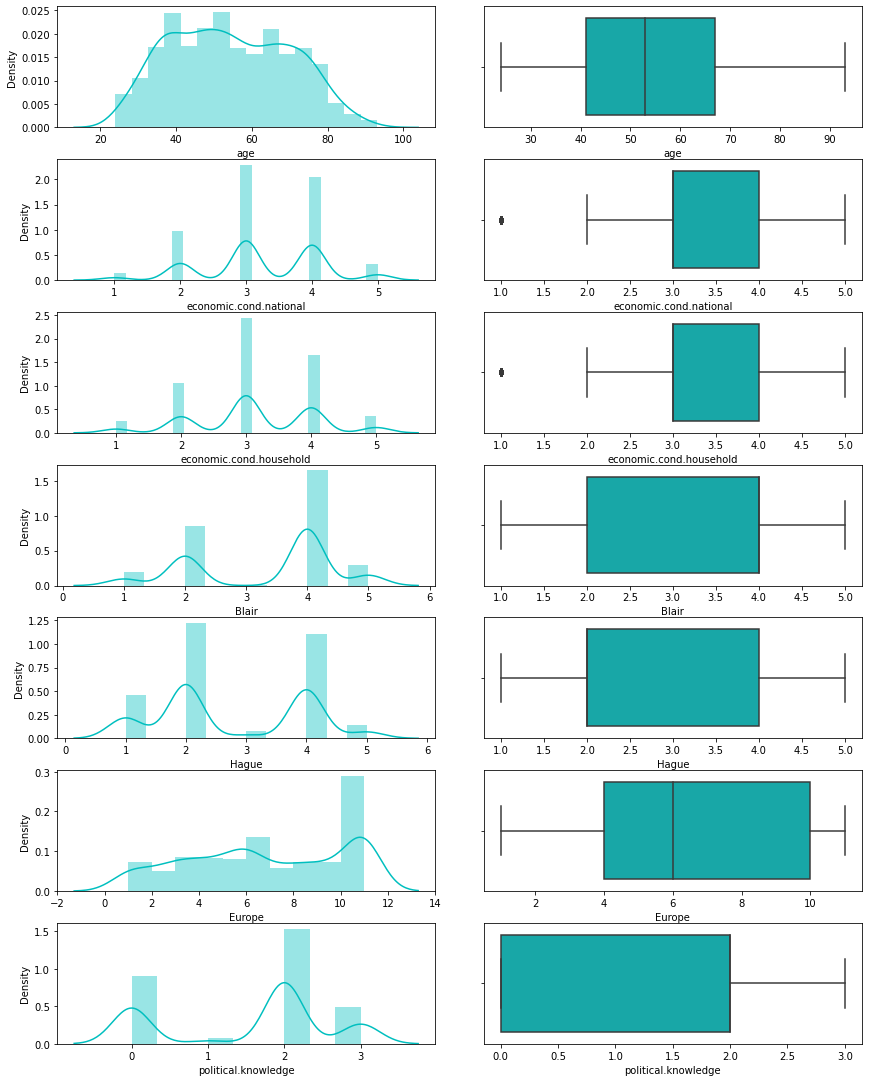

In [74]:
# construct histogram and box plot for continuous variables
fig,ax = plt.subplots(nrows=7, ncols=2, figsize= (12,15))
fig.tight_layout()

sns.distplot(df['age'], ax = ax[0][0],color='c')
sns.boxplot(df['age'], ax = ax[0][1],color='c')


sns.distplot(df['economic.cond.national'], ax = ax[1][0],color='c')
sns.boxplot(df['economic.cond.national'], ax = ax[1][1],color='c')


sns.distplot(df['economic.cond.household'], ax = ax[2][0],color='c')
sns.boxplot(df['economic.cond.household'], ax = ax[2][1],color='c');


sns.distplot(df['Blair'], ax = ax[3][0],color='c')
sns.boxplot(df['Blair'], ax = ax[3][1],color='c');


sns.distplot(df['Hague'], ax = ax[4][0],color='c')
sns.boxplot(df['Hague'], ax = ax[4][1],color='c');


sns.distplot(df['Europe'], ax = ax[5][0],color='c')
sns.boxplot(df['Europe'], ax = ax[5][1],color='c');


sns.distplot(df['political.knowledge'], ax = ax[6][0],color='c')
sns.boxplot(df['political.knowledge'], ax = ax[6][1],color='c');


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [18]:
outlier_per=pd.DataFrame(round(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).mean(),2),columns=['Outlier%'])
outlier_per

,Outlier%
Blair,0.00
Europe,0.00
Hague,0.00
age,0.00
economic.cond.household,0.04
economic.cond.national,0.02
gender,0.00
political.knowledge,0.00
vote,0.00


## <span style='color:Green'>Key Observations </span>

- The 'age' column is close to normal distribution.
- Rest of the columns show multimodal distribution.
- The boxplot shows no or very few outliers which are acceptable.

### Categorical variable

In [19]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

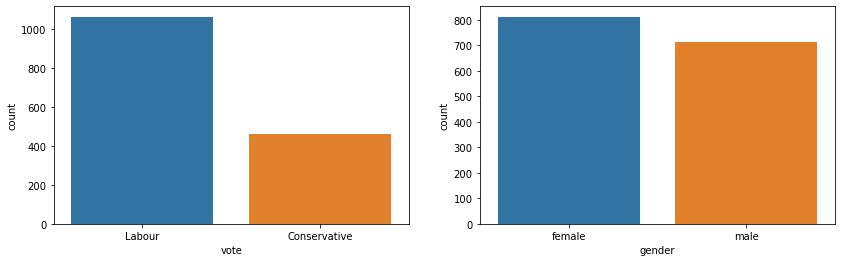

In [55]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(x=df['vote'],ax = axes[0])
sns.countplot(x=df['gender'],ax = axes[1])

plt.show()


## <span style='color:Green'>Inferences on univariate analysis </span>

- The 'age' column is close to normal distribution.
- Rest of the columns show multimodal distribution.
- The boxplot shows no or very few outliers which are acceptable.
- Count of votes for 'Labour' party is more than double of 'Conservative' party.
- Number of female voters are more than that of male voters.

## Bivariate and Multivariate Analysis

Bivariate analysis is where you are comparing two variables to study their relationships. These variables could be dependent or independent to each other. In Bivariate analysis is that there is always a Y-value for each X-value.

The most common visual technique for bivariate analysis is a scatter plot, where one variable is on the x-axis and the other on the y-axis.

Multivariate analysis (MVA) is a Statistical procedure for analysis of data involving more than one type of measurement or observation. It may also mean solving problems where more than one dependent variable is analyzed simultaneously with other variables.

## Correlation

In [14]:
#checking correlation between variables
corr=df.corr()
corr

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


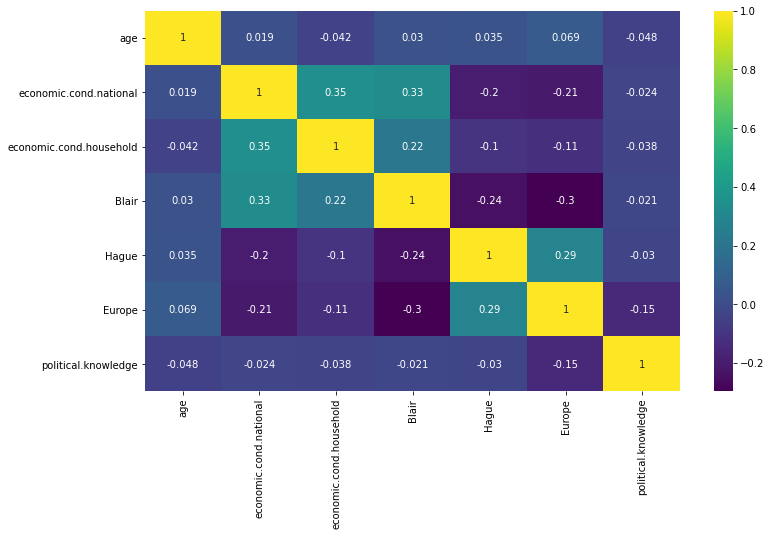

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

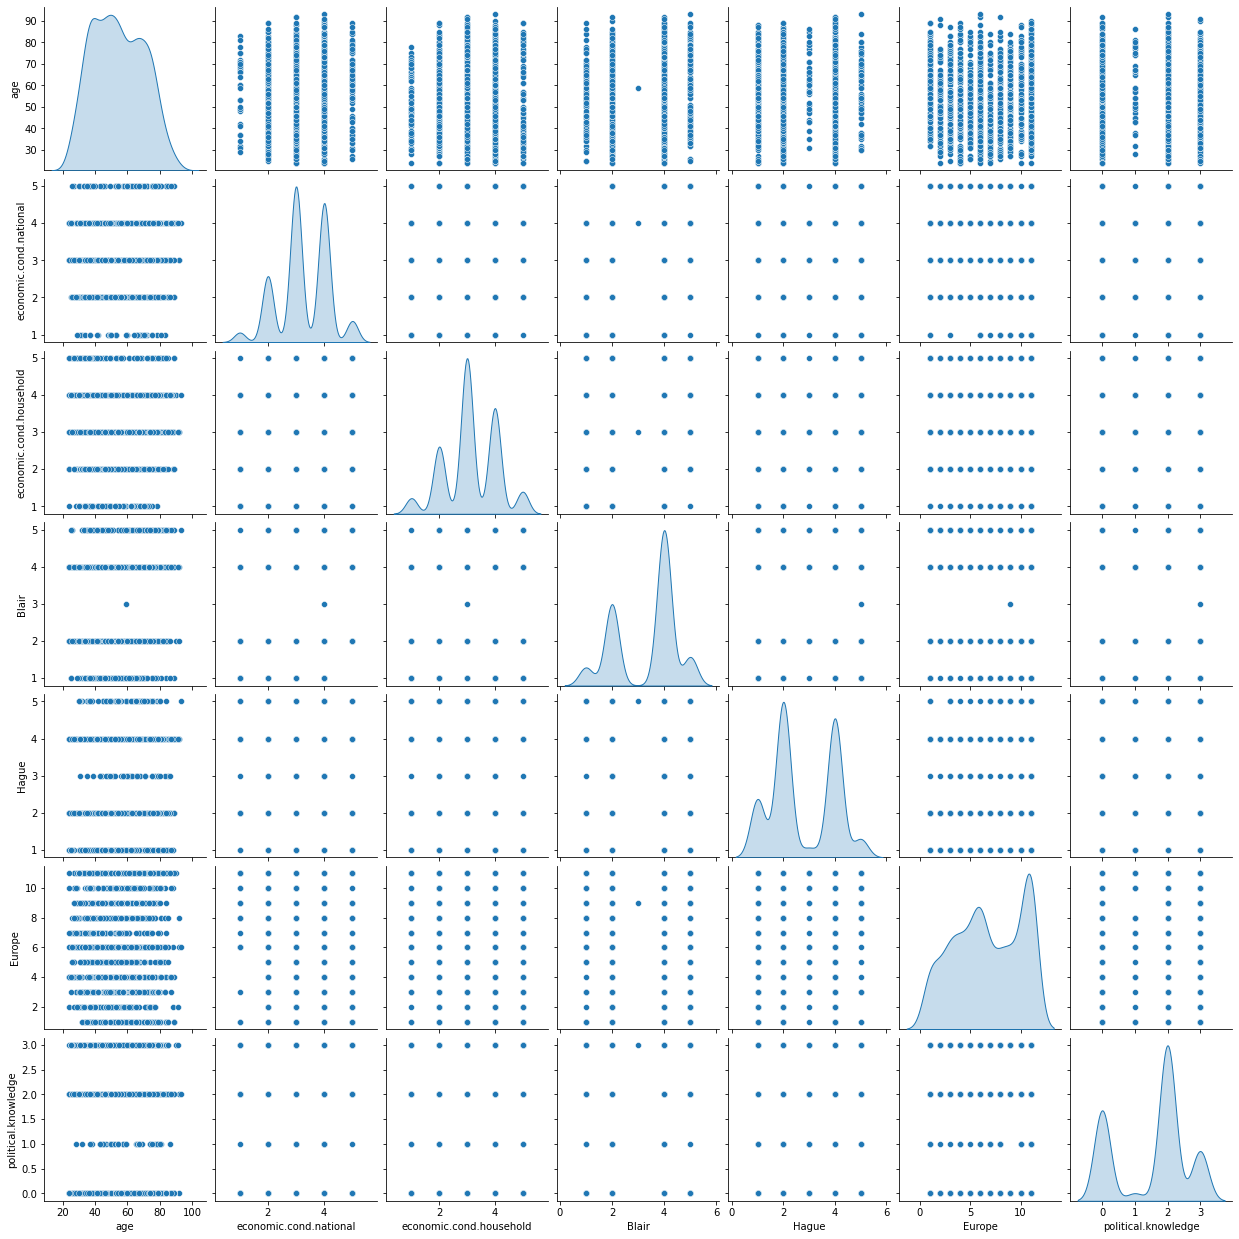

In [16]:
sns.pairplot(df, diag_kind='kde')

In [25]:
vote_perc=df.groupby(['vote', 'gender'])
vote_perc.first()

age  economic.cond.national  economic.cond.household  \
vote         gender                                                         
Conservative female   60                       3                        2   
             male     44                       2                        4   
Labour       female   43                       3                        3   
             male     36                       4                        4   

                     Blair  Hague  Europe  political.knowledge  
vote         gender                                             
Conservative female      4      4       2                    2  
             male        4      4       9                    2  
Labour       female      4      1       2                    2  
             male        4      4       5                    2

<AxesSubplot:xlabel='vote', ylabel='count'>

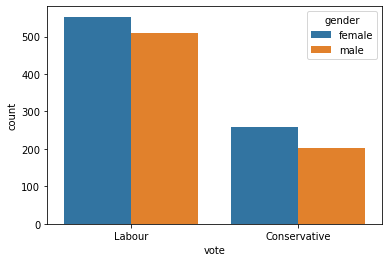

In [23]:
sns.countplot(x=df['vote'],hue=df['gender'])

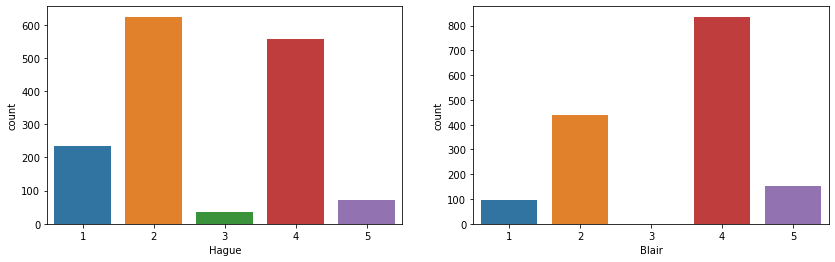

In [54]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(x=df['Hague'],ax = axes[0])
sns.countplot(x=df['Blair'],ax = axes[1])

plt.show()


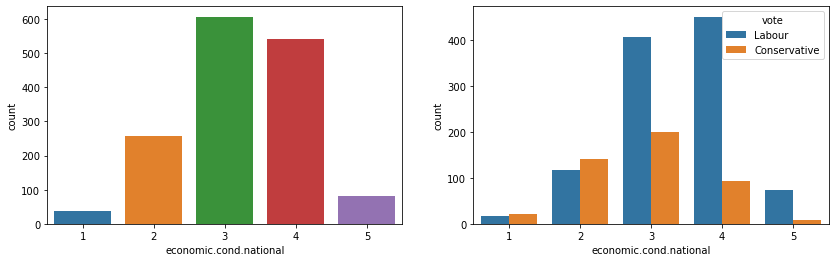

In [47]:
f, axes = plt.subplots(1,2,figsize=(14,4))


sns.countplot(x=df['economic.cond.national'],ax = axes[0])
sns.countplot(x=df['economic.cond.national'],hue=df['vote'],ax = axes[1])

plt.show()


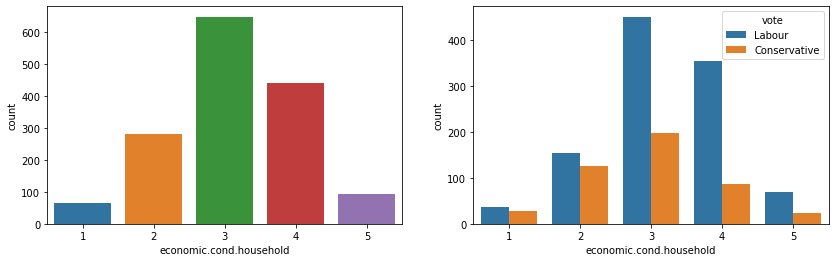

In [48]:
f, axes = plt.subplots(1,2,figsize=(14,4))


sns.countplot(x=df['economic.cond.household'],ax = axes[0])
sns.countplot(x=df['economic.cond.household'],hue=df['vote'],ax = axes[1])

plt.show()


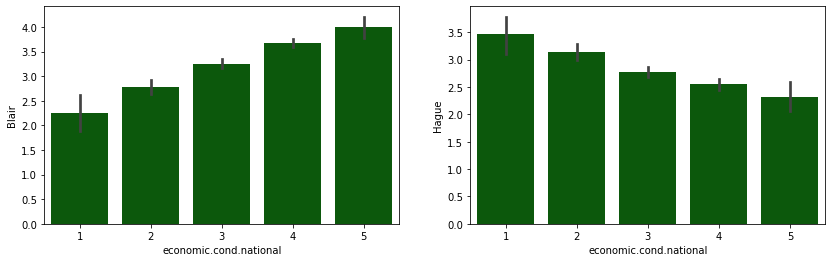

In [64]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.barplot(x="economic.cond.national",y="Blair", data=df, color='darkgreen',ax = axes[0])
sns.barplot(x="economic.cond.national",y="Hague", data=df, color='darkgreen',ax = axes[1])

plt.show()

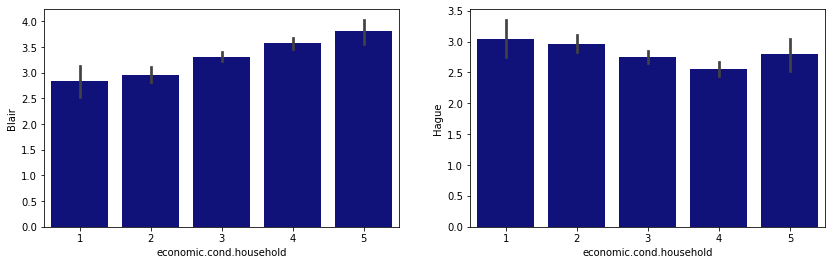

In [60]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.barplot(x="economic.cond.household",y="Blair", data=df, color='darkblue',ax = axes[0])
sns.barplot(x="economic.cond.household",y="Hague", data=df, color='darkblue',ax = axes[1])

plt.show()



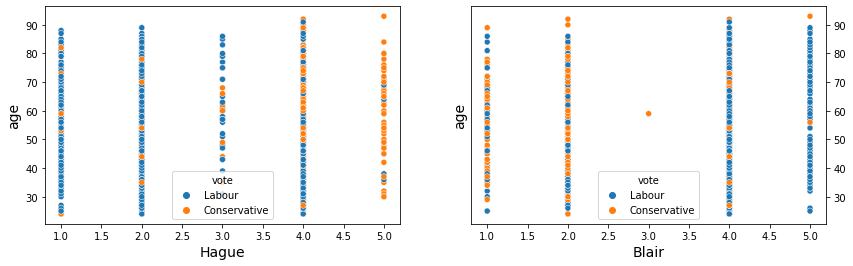

In [46]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.scatterplot(x = 'Hague', y = 'age', data = df, hue = 'vote', ax = axes[0])
axes[0].set_xlabel('Hague', fontsize=14)
axes[0].set_ylabel('age', fontsize=14)
axes[0].yaxis.set_label_position("left")
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'Blair', y = 'age', data = df, hue = 'vote', ax = axes[1])
axes[1].set_xlabel('Blair', fontsize=14)
axes[1].set_ylabel('age', fontsize=14)
axes[1].yaxis.set_label_position("left")
axes[1].yaxis.tick_right()

plt.show()

<AxesSubplot:xlabel='vote', ylabel='age'>

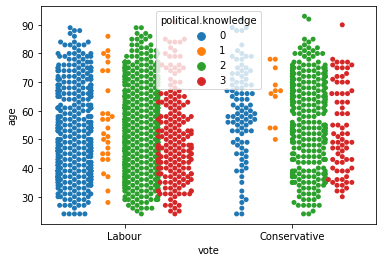

In [34]:
sns.swarmplot(x="vote", y="age", data=df,hue="political.knowledge",dodge=True)

In [50]:
df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [52]:
# Let us look at the target column which is 'vote' to understand how the data is distributed amongst the various values
df.groupby(["vote"]).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
Conservative,462,462,462,462,462,462,462,462
Labour,1063,1063,1063,1063,1063,1063,1063,1063


In [114]:
vote_Labour = len(df[df['vote']=='Labour'])
vote_Cons = len(df[df['vote']=='Conservative'])
percent_vote_Cons= vote_Cons/(vote_Labour+vote_Cons)
print("percentage of voters voted for Conservative party", round(percent_vote_Cons*100,2))
percent_vote_Labour= vote_Labour/(vote_Labour+vote_Cons)
print("percentage of voters voted for Labour party",round(percent_vote_Labour*100,2))


percentage of voters voted for Conservative party 30.32
percentage of voters voted for Labour party 69.68


## <span style='color:Green'>Key Observations </span>

- None of the pair of variables are highly correlated.
- No noticable patterns seen in pair plot.
- More number of young voters are 'Blair' supporters.
- Highest number of females voted for 'Labour party'.
- Number of 'Blair' supporters are more than that of 'Hague' across all eligible voters.
- Blair supporters gave an average raring for both current national economic condition as well as household condition and they are in more number.
- Voters with good political knowledge were voted for 'Labour' party.

### Data Encoding

In [25]:
## Converting the 'object' type variables as dummy variables

data_dummy = pd.get_dummies(df,columns=['vote','gender'],drop_first=True)
data_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


- Standardization(sometimes called data normalization or feature scaling) refers to the process of rescaling the values of the variables in the data set so that they share a common scale.

- Standardization helps to make the relative weight of each variable equal by converting each variable to a unitless measure or relative distance.

- Distance-based algorithms like KNN are most affected by the range of features. This is because they use distances between data points to determine their similarity. Therefore, it is necessary to scale the data before employing a distance-based algorithm so that all the features contribute equally to the result.

- Algorithms like Linear Discriminant Analysis(LDA) are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

#### Since all independent variables are of ordinal type except 'age', scaling is not necessary here.

### Train Test Split

In [26]:
# Copy all the predictor variables into X dataframe
X = data_dummy.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = data_dummy['vote_Labour']

In [27]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=data_dummy['vote_Labour'])

In [28]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',1061+456)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)
Total Obs 1517


In [107]:
y_train.value_counts(1)

Labour          0.696513
Conservative    0.303487
Name: vote, dtype: float64

In [108]:
y_test.value_counts(1)

Labour          0.697368
Conservative    0.302632
Name: vote, dtype: float64

## Modelling

## Logistic Regression Model

- Logistic regression and linear discriminant analyses are multivariate statistical methods which can be used for the evaluation of the associations between various covariates and a categorical outcome.

- Logistic regression is a form of regression which is used when the dependent variable is dichotomous, discrete, or categorical, and the explanatory variables are of any kind. 

- Using the logit transformation, logistic regression predicts always the probability of group membership in relation to several variables independent of their distribution. 

- The logistic regression analysis is based on calculating the odds of the outcome as the ratio of the probability of having the outcome divided by the probability of not having it.

In [29]:
# Fit the Logistic Regression model
basic_log = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
basic_log .fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [30]:
log_ytrain_predict = basic_log .predict(X_train)
log_ytest_predict = basic_log .predict(X_test)

### Getting the Predicted Classes and Probs

In [31]:
log_ytest_predict_prob=basic_log .predict_proba(X_test)
pd.DataFrame(log_ytest_predict_prob).head()

,0,1
0,0.199510,0.800490
1,0.610744,0.389256
2,0.083468,0.916532
3,0.030816,0.969184
4,0.135993,0.864007


## LDA Model

- Discriminant analysis is a similar classification method that is used to determine which set of variables discriminate between two or more naturally occurring groups and to classify an observation into these known groups. 

- In order to achieve that discriminant analysis is based on the estimation of the orthogonal discriminant functions, the linear combination of the standardized independent predictor variables gives the greatest means differences between the existing groups.

In [53]:
# fit lineardiscriminant
LDA = LinearDiscriminantAnalysis()
basic_LDA=LDA.fit(X,y)
basic_LDA

LinearDiscriminantAnalysis()

In [54]:
# Predict it
pred_class = basic_LDA.predict(X)
data_dummy['Prediction'] = pred_class 
data_dummy['Prediction']

0       1
1       1
2       1
3       1
4       1
       ..
1520    0
1521    0
1522    1
1523    0
1524    0
Name: Prediction, Length: 1517, dtype: uint8

### KNN Model

- The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. 
- The algorithm can be used to solve both classification and regression problem statements.
- The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol ‘K’.
- KNN algorithm fairs across all parameters of considerations. It is commonly used for its easy of interpretation and low calculation time.


In [34]:
from sklearn.neighbors import KNeighborsClassifier
#basic_KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
basic_KNN = KNeighborsClassifier()

In [35]:
# Call Nearest Neighbour algorithm

basic_KNN.fit(X_train, y_train)

KNeighborsClassifier()

### Naive Bayes Model

- Naive Bayes is a kind of classifier which uses the Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class.  The class with the highest probability is considered as the most likely class.

- Naive Bayes classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.


In [36]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
basic_NB = GaussianNB()

basic_NB.fit(X_train, y_train.ravel())

GaussianNB()

### Model Tuning

Tuning is usually a trial-and-error process by which you change some hyperparameters (for example, the number of trees in a tree-based algorithm or the value of alpha in a linear algorithm), run the algorithm on the data again, then compare its performance on your validation set in order to determine which set of hyperparameters results in the most accurate model.

### Applying GridSearchCV for Logistic Regression

In [57]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [58]:
gridlog_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [59]:
grid_search = GridSearchCV(estimator = gridlog_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [61]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [62]:
#storing the best model in an object
log_best = grid_search.best_estimator_

In [63]:
log_best.intercept_ 

array([3.32880868])

In [64]:
log_best.coef_

array([[-0.01330549,  0.34663327,  0.0348106 ,  0.54918888, -0.85541585,
        -0.20803056, -0.40314068,  0.04904411]])

In [65]:
# Prediction on the training set

Grid_ytrain_predict = log_best.predict(X_train)
Grid_ytest_predict = log_best.predict(X_test)

In [66]:
## Getting the probabilities on the test set

ytest_predict_prob=log_best.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.201105,0.798895
1,0.608604,0.391396
2,0.084432,0.915568
3,0.031313,0.968687
4,0.136454,0.863546


The intercept for the model is: [3.32880868]
The coefficient for age is -0.013305494968447905
The coefficient for economic.cond.national is 0.34663327231628677
The coefficient for economic.cond.household is 0.03481059831215456
The coefficient for Blair is 0.5491888789291104
The coefficient for Hague is -0.8554158468602766
The coefficient for Europe is -0.20803055797958492
The coefficient for political.knowledge is -0.4031406786941476
The coefficient for gender_male is 0.04904411066926881


Text(0, 0.5, 'FEATURE NAMES')

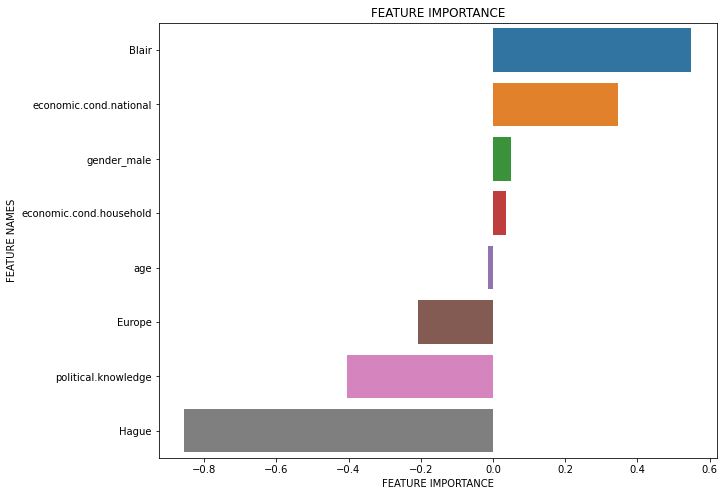

In [91]:
# Let us explore the coefficients for each of the independent attributes
print("The intercept for the model is:",log_best .intercept_)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,log_best .coef_[0][idx]))
    

#create a feature importance array of model coefficients
importance=[]
i=0
for column in X.columns:
    if i < 10:
        importance.append(log_best .coef_[0][i])
        #print("The imporatnce for {} is {}".format(column, importance.append(log_model.coef_[0][i]))
        i = i+1
importance

#Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [127]:
log_coef=pd.DataFrame(log_best.coef_.ravel(),X_train.columns)
log_coef
log_coef.style.applymap(color_negative_red)

,0
age,-0.013305
economic.cond.national,0.346633
economic.cond.household,0.034811
Blair,0.549189
Hague,-0.855416
Europe,-0.208031
political.knowledge,-0.403141
gender_male,0.049044


Variables showing Positive effect on regression model are:
‘Blair’, ’current national economic condition and household condition’,’ gender’-these factors highly influencing the model.


### Applying GridSearchCV on LDA Model

In [48]:
# Linear Discriminant Analysis - Parameter Tuning
basic_LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ['sag',"svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(basic_LDA, param_grid = lda_param_grid, cv=5,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=4,
             param_grid={'solver': ['sag', 'svd'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy', verbose=1)

In [49]:
print(gsLDA.best_params_)

{'solver': 'svd', 'tol': 0.0001}


In [50]:
LDA_best = gsLDA.best_estimator_

#intercept
LDA_best.intercept_

array([3.6784368])

In [51]:
# Let us explore the coefficients for each of the independent attributes
print("The intercept for the model is:",LDA_best .intercept_)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,LDA_best .coef_[0][idx]))

The intercept for the model is: [3.6784368]
The coefficient for age is -0.01746970214807123
The coefficient for economic.cond.national is 0.364242150260968
The coefficient for economic.cond.household is 0.030375855682563117
The coefficient for Blair is 0.687664480898467
The coefficient for Hague is -0.9748271902481125
The coefficient for Europe is -0.22179228698813191
The coefficient for political.knowledge is -0.48344559454795843
The coefficient for gender_male is 0.01596751156079826


In [41]:
def color_negative_red(val):
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color



In [42]:
lda_coef=pd.DataFrame(LDA_best.coef_.ravel(),X_train.columns)
lda_coef
lda_coef.style.applymap(color_negative_red)

,0
age,-0.017470
economic.cond.national,0.364242
economic.cond.household,0.030376
Blair,0.687664
Hague,-0.974827
Europe,-0.221792
political.knowledge,-0.483446
gender_male,0.015968


Text(0, 0.5, 'FEATURE NAMES')

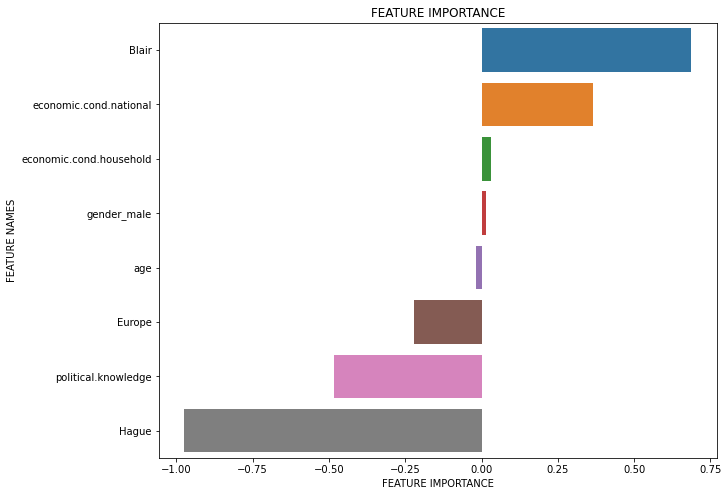

In [56]:
#create a feature importance array of model coefficients
importance=[]
i=0
for column in X.columns:
    if i < 10:
        importance.append(LDA_best .coef_[0][i])
        #print("The imporatnce for {} is {}".format(column, importance.append(log_model.coef_[0][i]))
        i = i+1
importance

#Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

### Applying GridSearchCV on KNN Model

In [73]:
# from sklearn.model_selection import GridSearchCV
# param_grid = dict(n_neighbors=[5,7,9,10,15])
  
# # defining parameter range
# grid_KNN = GridSearchCV(basic_KNN,param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# # fitting the model for grid search
# grid_KNN.fit(X_train, y_train)

# #get best parameters
# grid_KNN.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


{'n_neighbors': 10}

In [129]:
 from sklearn.model_selection import GridSearchCV


 param_grid={'n_neighbors':[5,7,9,10,15],
              'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
  
 # defining parameter range
 grid_KNN = GridSearchCV(basic_KNN,param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
 # fitting the model for grid search
grid_KNN.fit(X_train, y_train)

 #get best parameters
grid_KNN.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}

In [74]:
KNN_best=grid_KNN.best_estimator_


### Applying GridSearchCV on NB Model

Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.

Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed. By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=1)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=basic_NB, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [78]:
gs_NB.best_params_

{'var_smoothing': 0.657933224657568}

In [79]:
NB_best=gs_NB.best_estimator_

### Ensemble Learning - Bagging

In [81]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7785087719298246


In [82]:
#Regularize decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8133836003770029
0.8245614035087719


In [83]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

1.0
0.8421052631578947


### Ensemble Learning - AdaBoosting

In [84]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

print(abcl.score(X_train, y_train))
print(abcl.score(X_test, y_test))

0.8341187558906692
0.8508771929824561


### Ensemble Learning - GradientBoost

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.8699340245051838
0.8508771929824561


### Ensemble RandomForest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=4)
rfcl = rfcl.fit(X_train, y_train)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

1.0
0.8486842105263158


In [89]:
#create a feature importance array of model coefficients
importance=rfcl.feature_importances_

Text(0, 0.5, 'FEATURE NAMES')

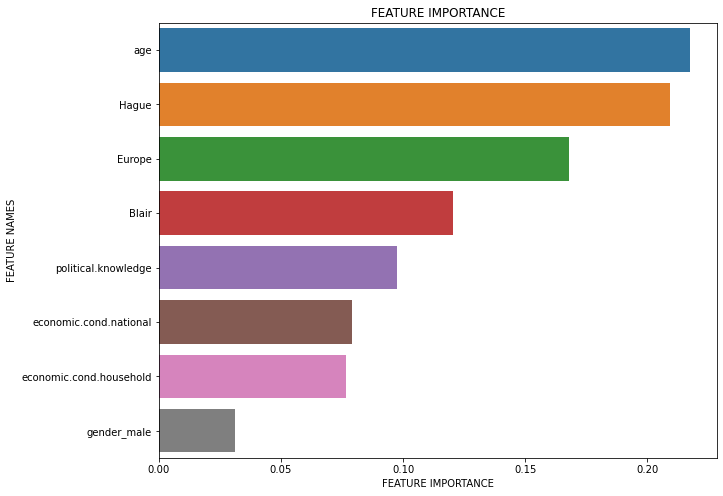

In [90]:
#Create arrays from feature importance and feature names
feature_importance = np.array(importance)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

## Model Evaluation

### Logistic Regression Model Evaluation

### For Training data

In [46]:
# Accuracy - Training Data
log_train_accuracy=basic_log.score(X_train, y_train)
log_train_accuracy

0.827521206409048

In [47]:
#confusion matrix for train data
conf_mat_log=confusion_matrix(y_train, log_ytrain_predict)
conf_mat_log

array([[213, 109],
       [ 74, 665]], dtype=int64)

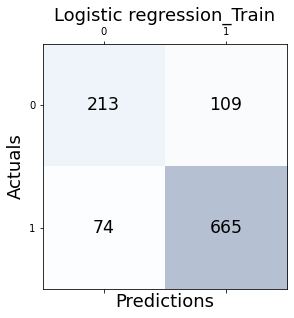

In [48]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_log, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_log.shape[0]):
    for j in range(conf_mat_log.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_log[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic regression_Train', fontsize=18)
plt.show()

### AUC and ROC for the training data

AUC: 0.877


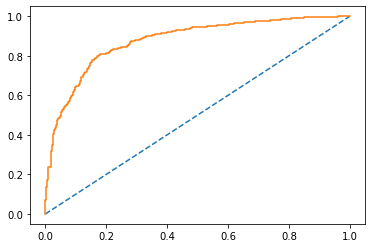

In [49]:
# predict probabilities
probs = basic_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [50]:
print(classification_report(y_train, log_ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



### For Testing data

In [51]:
# Accuracy - Test Data
log_test_accuracy=basic_log.score(X_test, y_test)
log_test_accuracy

0.8552631578947368

In [52]:
#confusion matrix for test data
conf_mat_logt=confusion_matrix(y_test, log_ytest_predict)
conf_mat_logt

array([[ 94,  44],
       [ 22, 296]], dtype=int64)

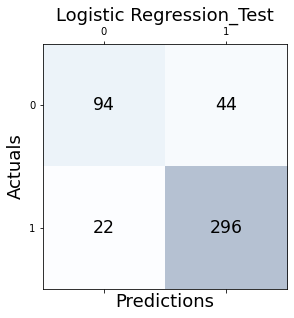

In [53]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_logt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_logt.shape[0]):
    for j in range(conf_mat_logt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_logt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression_Test', fontsize=18)
plt.show()

### AUC and ROC for the test data

AUC: 0.913


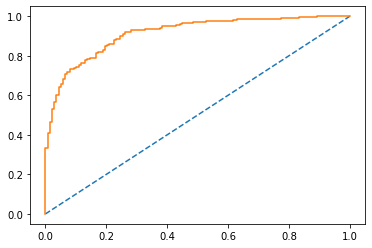

In [54]:
# predict probabilities
probs = basic_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [55]:
print(classification_report(y_test, log_ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



In [205]:
Log_auc_train=0.87
Log_auc_test=0.91
Log_recall_train=0.90
Log_recall_test= 0.93
Log_precision_train=0.86 
Log_precision_test=0.87
Log_f1_train=0.88
Log_f1_test=0.90
Log_accuracy_train=0.83
Log_accuracy_test=0.86

### LDA Model Evaluation

#### Prediction

In [55]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_LDA_train = basic_LDA.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_LDA_test = basic_LDA.predict(X_test)

In [77]:
LDA_score= basic_LDA.score(X, y)
LDA_score

0.8345418589321029

### For Training Data

In [78]:
#confusion matrix for train data
conf_mat_LDA=confusion_matrix(y_train, pred_LDA_train)
conf_mat_LDA

array([[216, 106],
       [ 82, 657]], dtype=int64)

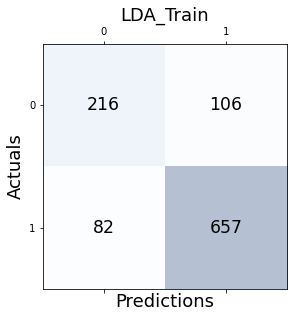

In [79]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_LDA, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_LDA.shape[0]):
    for j in range(conf_mat_LDA.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_LDA[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('LDA_Train', fontsize=18)
plt.show()

AUC: 0.876


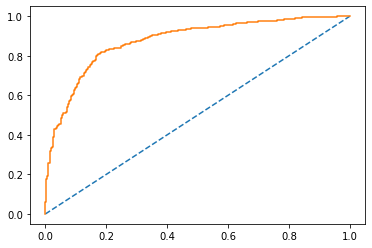

In [80]:
### AUC and ROC for the training data

# predict probabilities
probs = basic_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [81]:
print(classification_report(y_train, pred_LDA_train))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



### For Testing data

In [82]:
#confusion matrix for test data
conf_mat_LDAt=confusion_matrix(y_test, pred_LDA_test)
conf_mat_LDAt

array([[ 98,  40],
       [ 23, 295]], dtype=int64)

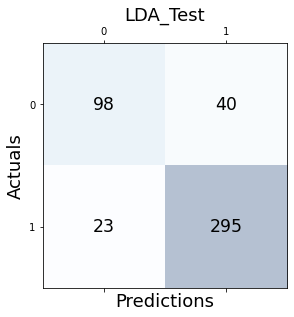

In [83]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_LDAt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_LDAt.shape[0]):
    for j in range(conf_mat_LDAt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_LDAt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('LDA_Test', fontsize=18)
plt.show()

### AUC and ROC for the test data

AUC: 0.918


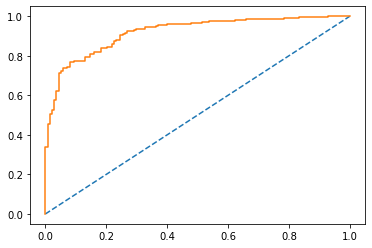

In [84]:
# predict probabilities
probs = basic_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [85]:
print(classification_report(y_test, pred_LDA_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [204]:
LDA_auc_train=0.87
LDA_auc_test=0.91
LDA_recall_train=0.89
LDA_recall_test= 0.93
LDA_precision_train=0.86 
LDA_precision_test=0.88
LDA_f1_train=0.87
LDA_f1_test=0.90
LDA_accuracy_train=0.82
LDA_accuracy_test=0.86

### KNN  Model Evaluation

### For Training data

In [86]:
## Performance Matrix on train data set
y_train_predict = KNN_best.predict(X_train)
model_score = basic_KNN.score(X_train, y_train)
print("Model score of basic KNN model on training data", model_score)

Model score of basic KNN model on training data 0.8491988689915174


In [87]:
conf_mat_KNN=metrics.confusion_matrix(y_train, y_train_predict)
conf_mat_KNN

array([[220, 102],
       [ 85, 654]], dtype=int64)

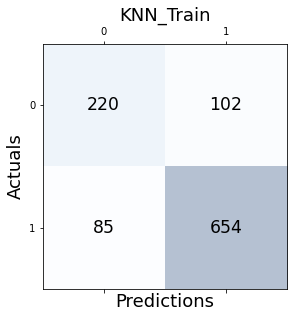

In [91]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_KNN, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_KNN.shape[0]):
    for j in range(conf_mat_KNN.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_KNN[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('KNN_Train', fontsize=18)
plt.show()

In [89]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



AUC: 0.918


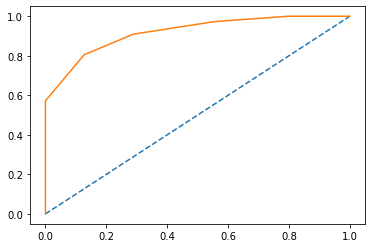

In [90]:
# predict probabilities
probs = basic_KNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [92]:
## Performance Matrix on test data set
y_test_predict =basic_KNN.predict(X_test)
model_score = KNN_best.score(X_test, y_test)
print("Model score of basic KNN model on testing data", model_score)

Model score of basic KNN model on testing data 0.8289473684210527


In [93]:
conf_mat_KNNt=metrics.confusion_matrix(y_test, y_test_predict)
conf_mat_KNNt

array([[ 88,  50],
       [ 38, 280]], dtype=int64)

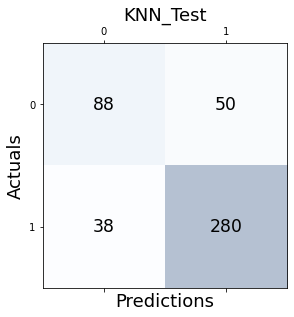

In [94]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_KNNt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_KNNt.shape[0]):
    for j in range(conf_mat_KNNt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_KNNt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('KNN_Test', fontsize=18)
plt.show()

In [95]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       138
           1       0.85      0.88      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



### AUC and ROC for the test data

AUC: 0.860


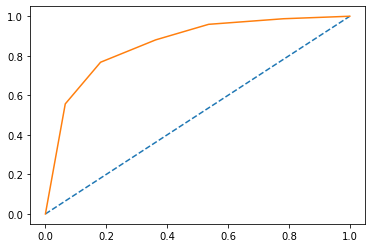

In [96]:
# predict probabilities
probs = basic_KNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [203]:
KNN_auc_train=0.91
KNN_auc_test=0.86
KNN_recall_train=0.88
KNN_recall_test= 0.88
KNN_precision_train=0.87 
KNN_precision_test=0.85
KNN_f1_train=0.87
KNN_f1_test=0.86
KNN_accuracy_train=0.82
KNN_accuracy_test=0.81

### Naive Bayes Model Evaluation

### For Training data

In [97]:
## Performance Matrix on train data set
y_train_predict =basic_NB.predict(X_train)
model_score = basic_NB.score(X_train, y_train)
print("Model score of basic Naive Bayes model on training data", model_score)

Model score of basic Naive Bayes model on training data 0.8199811498586239


In [98]:
conf_mat_NB=metrics.confusion_matrix(y_train, y_train_predict)
conf_mat_NB

array([[226,  96],
       [ 95, 644]], dtype=int64)

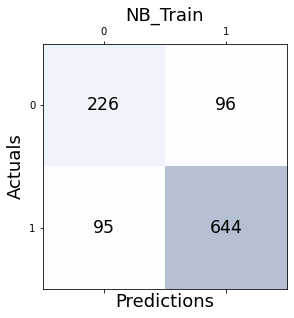

In [99]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_NB, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_NB.shape[0]):
    for j in range(conf_mat_NB.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_NB[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('NB_Train', fontsize=18)
plt.show()

In [100]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



AUC: 0.873


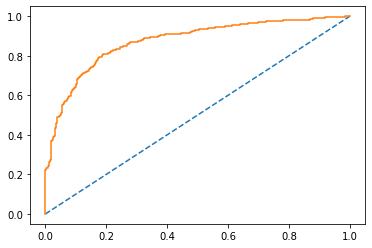

In [101]:
# predict probabilities
probs = basic_NB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [102]:
## Performance Matrix on test data set
y_test_predict = basic_NB.predict(X_test)
model_score = basic_NB.score(X_test, y_test)
print("Model score of Naive Bayes model on testing data", model_score)

Model score of Naive Bayes model on testing data 0.8574561403508771


In [103]:
conf_mat_NBt=metrics.confusion_matrix(y_test, y_test_predict)
conf_mat_NBt

array([[100,  38],
       [ 27, 291]], dtype=int64)

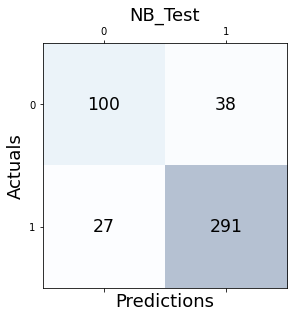

In [104]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_NBt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_NBt.shape[0]):
    for j in range(conf_mat_NBt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_NBt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('NB_Test', fontsize=18)
plt.show()

In [105]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



### AUC and ROC for the test data

AUC: 0.912


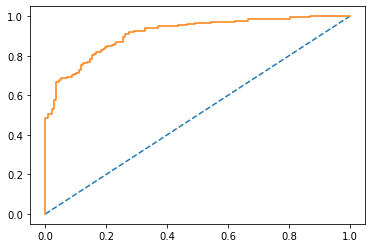

In [106]:
# predict probabilities
probs = basic_NB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [202]:
NB_auc_train=0.87
NB_auc_test=0.91
NB_recall_train=0.87
NB_recall_test= 0.92
NB_precision_train=0.87 
NB_precision_test=0.88
NB_f1_train=0.87
NB_f1_test=0.90
NB_accuracy_train=0.82
NB_accuracy_test=0.86

### Logistic Regression with GridSearch Model Evaluation

### For Training data

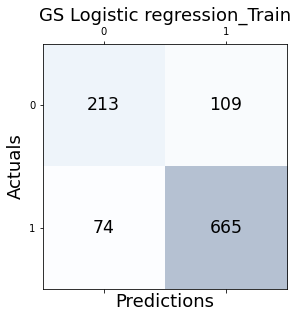

In [66]:
# Accuracy - Training Data
gslog_train_accuracy=log_best.score(X_train, y_train)
gslog_train_accuracy

#confusion matrix for train data
conf_mat_gslog=confusion_matrix(y_train, log_ytrain_predict)
conf_mat_gslog

#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gslog, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gslog.shape[0]):
    for j in range(conf_mat_gslog.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gslog[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GS Logistic regression_Train', fontsize=18)
plt.show()

AUC: 0.877


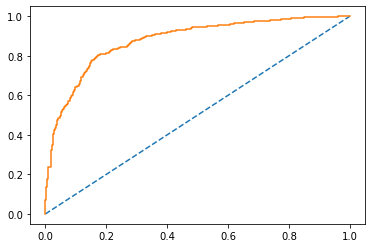

In [67]:
### AUC and ROC for the training data

# predict probabilities
probs = log_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [109]:
print(classification_report(y_train, log_ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



### For Testing data

In [68]:
# Accuracy - Test Data
gslog_test_accuracy=log_best.score(X_test, y_test)
gslog_test_accuracy

0.8552631578947368

In [70]:
#confusion matrix for test data
conf_mat_gslogt=confusion_matrix(y_test, log_ytest_predict)
conf_mat_gslogt

array([[ 94,  44],
       [ 22, 296]], dtype=int64)

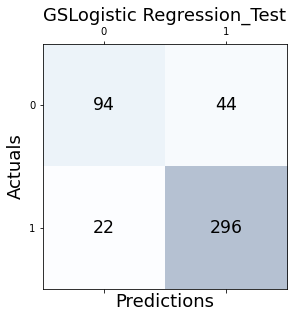

In [71]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gslogt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gslogt.shape[0]):
    for j in range(conf_mat_gslogt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gslogt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSLogistic Regression_Test', fontsize=18)
plt.show()

### AUC and ROC for the test data

AUC: 0.913


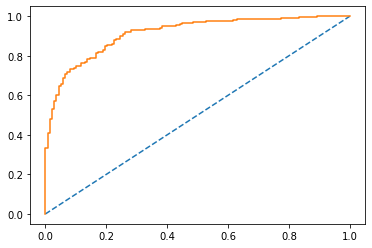

In [113]:
# predict probabilities
probs = log_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [114]:
print(classification_report(y_test, log_ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



In [201]:
gsLog_auc_train=0.87
gsLog_auc_test=0.91
gsLog_recall_train=0.90
gsLog_recall_test= 0.93
gsLog_precision_train=0.86 
gsLog_precision_test=0.87
gsLog_f1_train=0.88
gsLog_f1_test=0.90
gsLog_accuracy_train=0.83
gsLog_accuracy_test=0.86

### LDA with GridSearch Model Evaluation

#### Prediction

In [115]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_gsLDA_train = LDA_best.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_gsLDA_test = LDA_best.predict(X_test)

### For Training Data

In [116]:
#confusion matrix for train data
conf_mat_gsLDA=confusion_matrix(y_train, pred_gsLDA_train)
conf_mat_gsLDA

array([[217, 105],
       [ 83, 656]], dtype=int64)

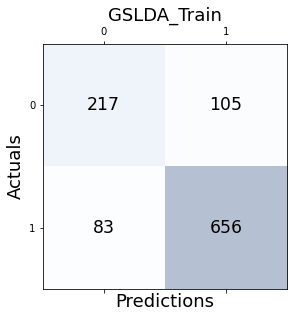

In [117]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gsLDA, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gsLDA.shape[0]):
    for j in range(conf_mat_gsLDA.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gsLDA[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSLDA_Train', fontsize=18)
plt.show()

### AUC and ROC for the training data

AUC: 0.877


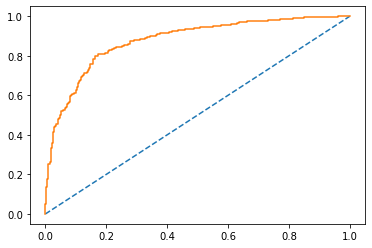

In [118]:
# predict probabilities
probs = LDA_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [119]:
print(classification_report(y_train, pred_gsLDA_train))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



### For Testing data

In [120]:
#confusion matrix for test data
conf_mat_gsLDAt=confusion_matrix(y_test, pred_gsLDA_test)
conf_mat_gsLDAt

array([[ 95,  43],
       [ 24, 294]], dtype=int64)

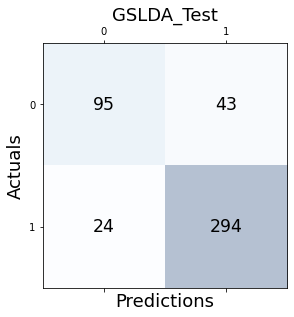

In [121]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gsLDAt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gsLDAt.shape[0]):
    for j in range(conf_mat_gsLDAt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gsLDAt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSLDA_Test', fontsize=18)
plt.show()

AUC: 0.914


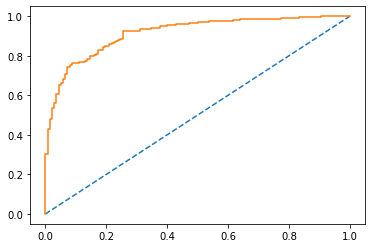

In [122]:
### AUC and ROC for the test data

# predict probabilities
probs = LDA_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [123]:
print(classification_report(y_test, pred_gsLDA_test))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



In [200]:
gsLDA_auc_train=0.87
gsLDA_auc_test=0.91
gsLDA_recall_train=0.89
gsLDA_recall_test= 0.92
gsLDA_precision_train=0.86 
gsLDA_precision_test=0.87
gsLDA_f1_train=0.87
gsLDA_f1_test=0.90
gsLDA_accuracy_train=0.82
gsLDA_accuracy_test=0.85

### KNN with GridSearch Model Evaluation

### For Training data

In [144]:
## Performance Matrix on train data set
y_train_predict = KNN_best.predict(X_train)
model_score = KNN_best.score(X_train, y_train)

In [145]:
print("Model score of basic KNN model on training data", model_score)
conf_mat_gsKNN=metrics.confusion_matrix(y_train, y_train_predict)
conf_mat_gsKNN

Model score of basic KNN model on training data 0.823751178133836


array([[220, 102],
       [ 85, 654]], dtype=int64)

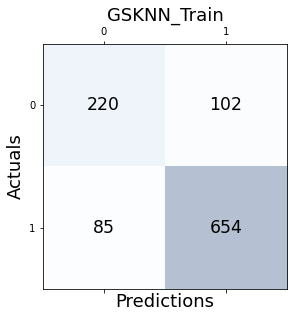

In [146]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gsKNN, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gsKNN.shape[0]):
    for j in range(conf_mat_gsKNN.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gsKNN[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSKNN_Train', fontsize=18)
plt.show()

In [147]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



AUC: 0.894


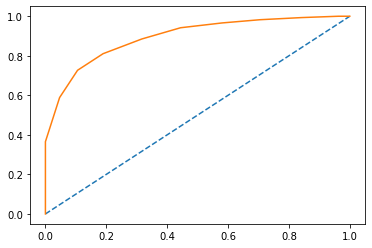

In [148]:
# predict probabilities
probs = KNN_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [75]:
## Performance Matrix on test data set
y_test_predict =KNN_best.predict(X_test)
model_score = KNN_best.score(X_test, y_test)
print("Model score of best KNN model", model_score)

Model score of best KNN model 0.8289473684210527


In [76]:
conf_mat_gsKNNt=metrics.confusion_matrix(y_test, y_test_predict)
conf_mat_gsKNNt

array([[ 96,  42],
       [ 36, 282]], dtype=int64)

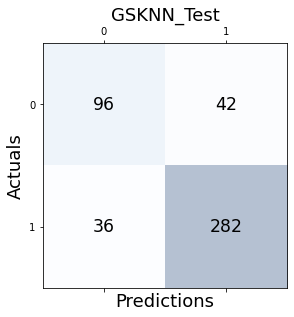

In [77]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gsKNNt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gsKNNt.shape[0]):
    for j in range(conf_mat_gsKNNt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gsKNNt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSKNN_Test', fontsize=18)
plt.show()

In [152]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       138
           1       0.87      0.89      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.886


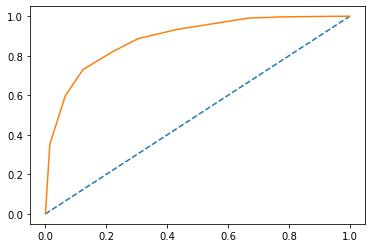

In [153]:
### AUC and ROC for the test data

# predict probabilities
probs = KNN_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [199]:
gsKNN_auc_train=0.89
gsKNN_auc_test=0.88
gsKNN_recall_train=0.88
gsKNN_recall_test= 0.89
gsKNN_precision_train=0.87 
gsKNN_precision_test=0.87
gsKNN_f1_train=0.87
gsKNN_f1_test=0.88
gsKNN_accuracy_train=0.82
gsKNN_accuracy_test=0.83

### Naive Bayes with GridSearch Model Evaluation

### For Training data

In [144]:
## Performance Matrix on train data set
y_train_predict =NB_best.predict(X_train)
model_score = NB_best.score(X_train, y_train)
print("Model score of basic Naive Bayes model on training data", model_score)

Model score of basic Naive Bayes model on training data 0.6965127238454288


In [145]:
conf_mat_gsNB=metrics.confusion_matrix(y_train, y_train_predict)
conf_mat_gsNB

array([[  0, 322],
       [  0, 739]], dtype=int64)

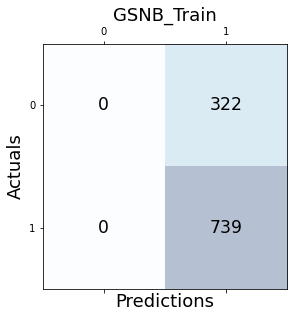

In [146]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gsNB, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gsNB.shape[0]):
    for j in range(conf_mat_gsNB.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gsNB[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSNB_Train', fontsize=18)
plt.show()

In [147]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.70      1.00      0.82       739

    accuracy                           0.70      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.49      0.70      0.57      1061



AUC: 0.453


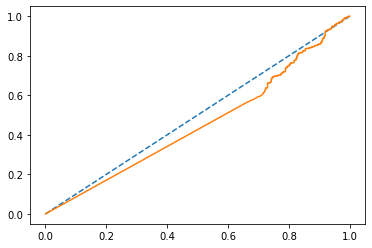

In [148]:
# predict probabilities
probs = NB_best.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [149]:
## Performance Matrix on test data set
y_test_predict = NB_best.predict(X_test)
model_score = NB_best.score(X_test, y_test)
print("Model score of best Naive Bayes model on testing data", model_score)

Model score of best Naive Bayes model on testing data 0.6973684210526315


In [150]:
conf_mat_gsNBt=metrics.confusion_matrix(y_test, y_test_predict)
conf_mat_gsNBt

array([[  0, 138],
       [  0, 318]], dtype=int64)

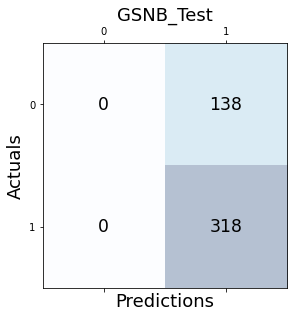

In [151]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gsNBt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gsNBt.shape[0]):
    for j in range(conf_mat_gsNBt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gsNBt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GSNB_Test', fontsize=18)
plt.show()

In [152]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456



AUC: 0.416


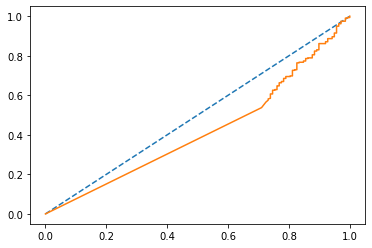

In [153]:
### AUC and ROC for the test data

# predict probabilities
probs = NB_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [198]:
gsNB_auc_train=0.45
gsNB_auc_test=0.41
gsNB_recall_train=1.00
gsNB_recall_test= 1.00
gsNB_precision_train=0.70 
gsNB_precision_test=0.70
gsNB_f1_train=0.82
gsNB_f1_test=0.82
gsNB_accuracy_train=0.70
gsNB_accuracy_test=0.70

### Bagging classifier model evaluation

### For Training data

In [154]:
## Performance Matrix on train data set
bag_train_predict =bgcl.predict(X_train)
bagmodel_score = NB_best.score(X_train, y_train)
print("Model score of bagging classifier model on train data", bagmodel_score)

Model score of bagging classifier model on train data 0.6965127238454288


In [155]:
conf_mat_bag=metrics.confusion_matrix(y_train, bag_train_predict)
conf_mat_bag

array([[322,   0],
       [  0, 739]], dtype=int64)

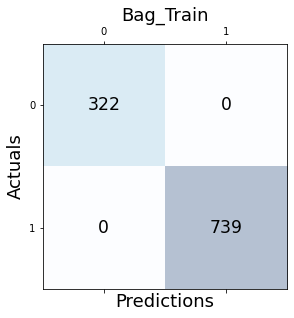

In [156]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_bag, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_bag.shape[0]):
    for j in range(conf_mat_bag.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_bag[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Bag_Train', fontsize=18)
plt.show()

In [157]:
print(metrics.classification_report(y_train, bag_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


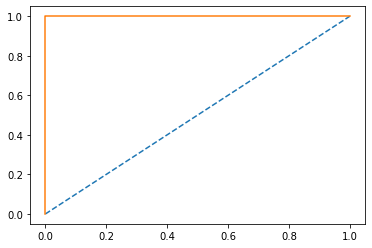

In [158]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [159]:
## Performance Matrix on test data set
bag_test_predict = bgcl.predict(X_test)
bagmodel_score = bgcl.score(X_test, y_test)
print("Model score of bagging classifier model on test data", model_score)

Model score of bagging classifier model on test data 0.6973684210526315


In [160]:
conf_mat_bagt=metrics.confusion_matrix(y_test, bag_test_predict)
conf_mat_bagt

array([[ 97,  41],
       [ 31, 287]], dtype=int64)

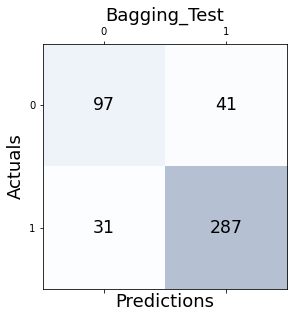

In [161]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_bagt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_bagt.shape[0]):
    for j in range(conf_mat_bagt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_bagt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Bagging_Test', fontsize=18)
plt.show()

In [162]:
print(metrics.classification_report(y_test, bag_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       138
           1       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.886


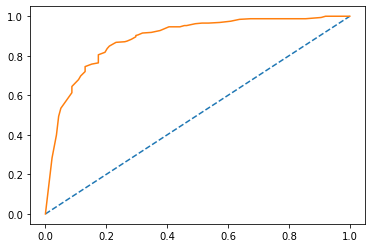

In [163]:
### AUC and ROC for the test data

# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [164]:
bg_auc_train=1.00
bg_auc_test=0.88
bg_recall_train=1.00
bg_recall_test= 0.90
bg_precision_train=1.00 
bg_precision_test=0.88
bg_f1_train=1.00
bg_f1_test=0.89
bg_accuracy_train=1.00
bg_accuracy_test=0.84

### AdaBoost classifier evaluation

### For Training data

In [165]:
## Performance Matrix on train data set
adb_train_predict =abcl.predict(X_train)
adbmodel_score = abcl.score(X_train, y_train)
print("Model score of adaboosting classifier on train data", adbmodel_score)

Model score of adaboosting classifier on train data 0.8341187558906692


In [166]:
conf_mat_adb=metrics.confusion_matrix(y_train, adb_train_predict)
conf_mat_adb

array([[232,  90],
       [ 86, 653]], dtype=int64)

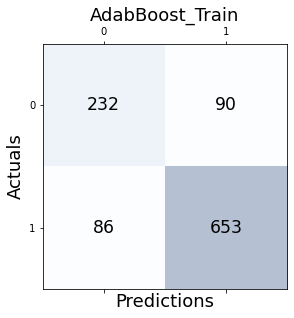

In [167]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_adb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_adb.shape[0]):
    for j in range(conf_mat_adb.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_adb[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('AdabBoost_Train', fontsize=18)
plt.show()

In [168]:
print(metrics.classification_report(y_train, adb_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       322
           1       0.88      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



AUC: 0.887


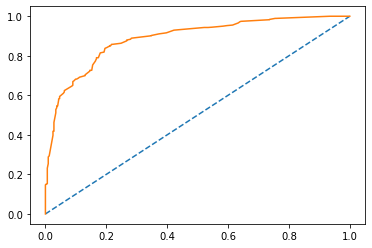

In [169]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [170]:
## Performance Matrix on test data set
adb_test_predict = abcl.predict(X_test)
adbmodel_score = abcl.score(X_test, y_test)
print("Model score of adaboost classifier model on test data", adbmodel_score)

Model score of adaboost classifier model on test data 0.8508771929824561


In [171]:
conf_mat_adbt=metrics.confusion_matrix(y_test, adb_test_predict)
conf_mat_adbt

array([[101,  37],
       [ 31, 287]], dtype=int64)

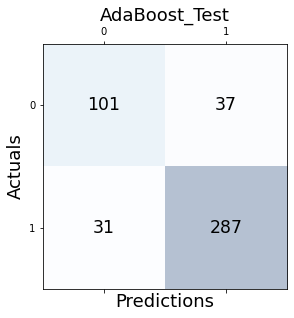

In [172]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_adbt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_adbt.shape[0]):
    for j in range(conf_mat_adbt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_adbt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('AdaBoost_Test', fontsize=18)
plt.show()

In [173]:
print(metrics.classification_report(y_test, adb_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       138
           1       0.89      0.90      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456



### AUC and ROC for the test data

AUC: 0.912


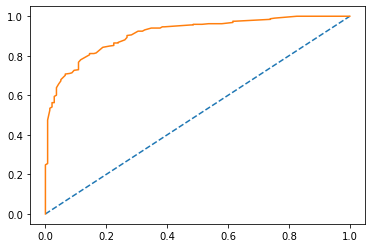

In [174]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [175]:
ab_auc_train=0.88
ab_auc_test=0.91
ab_recall_train=0.88
ab_recall_test= 0.90
ab_precision_train=0.88 
ab_precision_test=0.89
ab_f1_train=0.88
ab_f1_test=0.89
ab_accuracy_train=0.83
ab_accuracy_test=0.85

### GradientBoost classifier evaluation

### For Training data

In [176]:
## Performance Matrix on train data set
gb_train_predict =gbcl.predict(X_train)
gbmodel_score = gbcl.score(X_train, y_train)
print("Model score of gradientboosting classifier on train data", gbmodel_score)

Model score of gradientboosting classifier on train data 0.8699340245051838


In [177]:
conf_mat_gb=metrics.confusion_matrix(y_train, gb_train_predict)
conf_mat_gb

array([[240,  82],
       [ 56, 683]], dtype=int64)

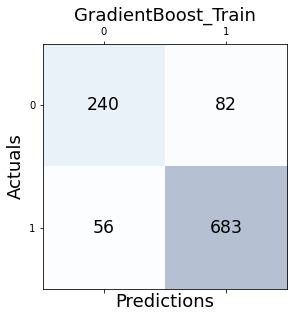

In [178]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gb.shape[0]):
    for j in range(conf_mat_gb.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gb[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GradientBoost_Train', fontsize=18)
plt.show()

In [179]:
print(metrics.classification_report(y_train, gb_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       322
           1       0.89      0.92      0.91       739

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



AUC: 0.933


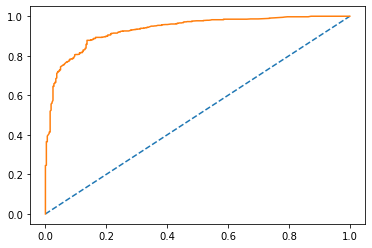

In [180]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [181]:
## Performance Matrix on test data set
gb_test_predict = gbcl.predict(X_test)
gbmodel_score = gbcl.score(X_test, y_test)
print("Model score of gradientboost classifier model on test data", gbmodel_score)

Model score of gradientboost classifier model on test data 0.8508771929824561


In [182]:
conf_mat_gbt=metrics.confusion_matrix(y_test, gb_test_predict)
conf_mat_gbt

array([[ 97,  41],
       [ 27, 291]], dtype=int64)

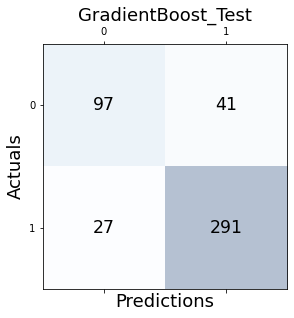

In [183]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_gbt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_gbt.shape[0]):
    for j in range(conf_mat_gbt.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_gbt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GradientBoost_Test', fontsize=18)
plt.show()

In [184]:
print(metrics.classification_report(y_test, gb_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.88      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



### AUC and ROC for the test data

AUC: 0.910


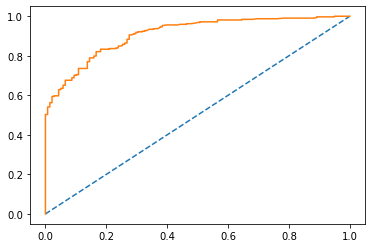

In [185]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [186]:
gb_auc_train=0.93
gb_auc_test=0.91
gb_recall_train=0.92
gb_recall_test= 0.92
gb_precision_train=0.89 
gb_precision_test=0.88
gb_f1_train=0.91
gb_f1_test=0.90
gb_accuracy_train=0.87
gb_accuracy_test=0.85


### Random Forest classifier evaluation

### For Training data

In [187]:
## Performance Matrix on train data set
rf_train_predict =rfcl.predict(X_train)
rfmodel_score = rfcl.score(X_train, y_train)
print("Model score of randomforest classifier on train data", rfmodel_score)

Model score of randomforest classifier on train data 1.0


In [188]:
conf_mat_rf=metrics.confusion_matrix(y_train,rf_train_predict)
conf_mat_rf

array([[322,   0],
       [  0, 739]], dtype=int64)

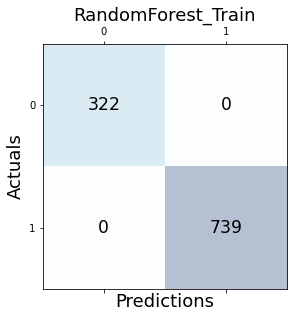

In [189]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_rf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_rf.shape[0]):
    for j in range(conf_mat_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RandomForest_Train', fontsize=18)
plt.show()

In [190]:
print(metrics.classification_report(y_train, rf_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


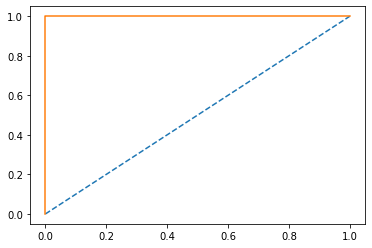

In [191]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Testing data

In [192]:
## Performance Matrix on test data set
rf_test_predict = rfcl.predict(X_test)
rfmodel_score = rfcl.score(X_test, y_test)
print("Model score of randomforest classifier model on test data", rfmodel_score)

Model score of randomforest classifier model on test data 0.8486842105263158


In [193]:
conf_mat_rft=metrics.confusion_matrix(y_test, rf_test_predict)
conf_mat_rft

array([[ 96,  42],
       [ 27, 291]], dtype=int64)

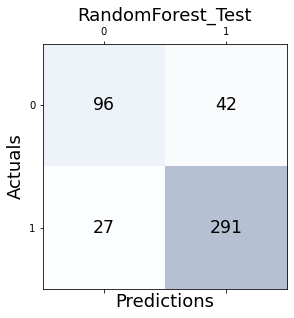

In [194]:
#Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(conf_mat_rft, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat_rft.shape[0]):
    for j in range(conf_mat_rft.shape[1]):
        ax.text(x=j, y=i,s=conf_mat_rft[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RandomForest_Test', fontsize=18)
plt.show()

In [195]:
print(metrics.classification_report(y_test, rf_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.87      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.81       456
weighted avg       0.85      0.85      0.85       456



### AUC and ROC for the test data

AUC: 0.890


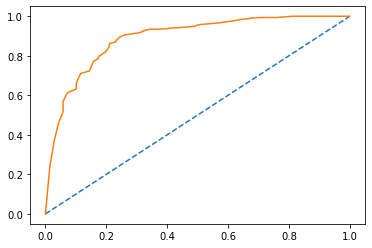

In [196]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [197]:
rf_auc_train=1.00
rf_auc_test=0.89
rf_recall_train=1.00
rf_recall_test= 0.92
rf_precision_train=1.00 
rf_precision_test=0.87 
rf_f1_train=1.00
rf_f1_test=0.89
rf_accuracy_train=1.00
rf_accuracy_test=0.85



## Model Comparison

In [206]:
models = [("Logistic Regression",Log_auc_train,Log_auc_test,Log_recall_train,Log_recall_test,Log_precision_train,Log_precision_test,Log_f1_train,Log_f1_test,Log_accuracy_train,Log_accuracy_test),
          
          ("LDA",LDA_auc_train,LDA_auc_test,LDA_recall_train,LDA_recall_test,LDA_precision_train,LDA_precision_test,LDA_f1_train,LDA_f1_test,LDA_accuracy_train,LDA_accuracy_test),
          
         ("KNN",KNN_auc_train,KNN_auc_test,KNN_recall_train,KNN_recall_test,KNN_precision_train,KNN_precision_test,KNN_f1_train,KNN_f1_test,KNN_accuracy_train,KNN_accuracy_test),
          
          ("Naive Bayes",NB_auc_train,NB_auc_test,NB_recall_train,NB_recall_test,NB_precision_train,NB_precision_test,NB_f1_train,NB_f1_test,NB_accuracy_train,NB_accuracy_test),
          
          ("Logistic Regression with Grid Search",gsLog_auc_train,gsLog_auc_test,gsLog_recall_train,gsLog_recall_test,gsLog_precision_train,gsLog_precision_test,gsLog_f1_train,gsLog_f1_test,gsLog_accuracy_train,gsLog_accuracy_test),
          
          ("LDA with Grid Search ",gsLDA_auc_train,gsLDA_auc_test,gsLDA_recall_train,gsLDA_recall_test,gsLDA_precision_train,gsLDA_precision_test,gsLDA_f1_train,gsLDA_f1_test,gsLDA_accuracy_train,gsLDA_accuracy_test),
          
          ("KNN with Grid Search",gsKNN_auc_train,gsKNN_auc_test,gsKNN_recall_train,gsKNN_recall_test,gsKNN_precision_train,gsKNN_precision_test,gsKNN_f1_train,gsKNN_f1_test,gsKNN_accuracy_train,gsKNN_accuracy_test),
          
          ("Naive Bayes with Grid Search",gsNB_auc_train,gsNB_auc_test,gsNB_recall_train,gsNB_recall_test,gsNB_precision_train,gsNB_precision_test,gsNB_f1_train,gsNB_f1_test,gsNB_accuracy_train,gsNB_accuracy_test),
          
          ("Bagging",bg_auc_train,bg_auc_test,bg_recall_train,bg_recall_test,bg_precision_train,bg_precision_test,bg_f1_train,bg_f1_test,bg_accuracy_train,bg_accuracy_test),
          
          ("AdaBoost",ab_auc_train,ab_auc_test,ab_recall_train,ab_recall_test,ab_precision_train,ab_precision_test,ab_f1_train,ab_f1_test,ab_accuracy_train,ab_accuracy_test),
          
          ("GradientBoost",gb_auc_train,gb_auc_test,gb_recall_train,gb_recall_test,gb_precision_train,gb_precision_test,gb_f1_train,gb_f1_test,gb_accuracy_train,gb_accuracy_test),
          
          ("random Forest",rf_auc_train,rf_auc_test,rf_recall_train,rf_recall_test,rf_precision_train,rf_precision_test,rf_f1_train,rf_f1_test,rf_accuracy_train,rf_accuracy_test),
          
          
         ]

In [214]:
predict = pd.DataFrame(data = models, columns=['Model','AUC(Train)','AUC(Test)','Recall(Train)','Recall(Test)','Precision(Train)','Precision(Test)','F1_score(Train)','F1_score(Test)','Accuracy(Train)','Accuracy(Test)' ])
predict

,Model,AUC(Train),AUC(Test),Recall(Train),Recall(Test),Precision(Train),Precision(Test),F1_score(Train),F1_score(Test),Accuracy(Train),Accuracy(Test)
0,Logistic Regression,0.87,0.91,0.90,0.93,0.86,0.87,0.88,0.90,0.83,0.86
1,LDA,0.87,0.91,0.89,0.93,0.86,0.88,0.87,0.90,0.82,0.86
2,KNN,0.91,0.86,0.88,0.88,0.87,0.85,0.87,0.86,0.82,0.81
3,Naive Bayes,0.87,0.91,0.87,0.92,0.87,0.88,0.87,0.90,0.82,0.86
4,Logistic Regression with Grid Search,0.87,0.91,0.90,0.93,0.86,0.87,0.88,0.90,0.83,0.86
5,LDA with Grid Search,0.87,0.91,0.89,0.92,0.86,0.87,0.87,0.90,0.82,0.85
6,KNN with Grid Search,0.89,0.88,0.88,0.89,0.87,0.87,0.87,0.88,0.82,0.83
7,Naive Bayes with Grid Search,0.45,0.41,1.00,1.00,0.70,0.70,0.82,0.82,0.70,0.70
8,Bagging,1.00,0.88,1.00,0.90,1.00,0.88,1.00,0.89,1.00,0.84
9,AdaBoost,0.88,0.91,0.88,0.90,0.88,0.89,0.88,0.89,0.83,0.85


In [215]:
#Crosstab for model comparision
Model_cmp=pd.pivot_table(predict, index='Model')
Model_cmp.style.applymap(color_green)
Model_cmp

,AUC(Test),AUC(Train),Accuracy(Test),Accuracy(Train),F1_score(Test),F1_score(Train),Precision(Test),Precision(Train),Recall(Test),Recall(Train)
Model,,,,,,,,,,
AdaBoost,0.91,0.88,0.85,0.83,0.89,0.88,0.89,0.88,0.90,0.88
Bagging,0.88,1.00,0.84,1.00,0.89,1.00,0.88,1.00,0.90,1.00
GradientBoost,0.91,0.93,0.85,0.87,0.90,0.91,0.88,0.89,0.92,0.92
KNN,0.86,0.91,0.81,0.82,0.86,0.87,0.85,0.87,0.88,0.88
KNN with Grid Search,0.88,0.89,0.83,0.82,0.88,0.87,0.87,0.87,0.89,0.88
LDA,0.91,0.87,0.86,0.82,0.90,0.87,0.88,0.86,0.93,0.89
LDA with Grid Search,0.91,0.87,0.85,0.82,0.90,0.87,0.87,0.86,0.92,0.89
Logistic Regression,0.91,0.87,0.86,0.83,0.90,0.88,0.87,0.86,0.93,0.90
Logistic Regression with Grid Search,0.91,0.87,0.86,0.83,0.90,0.88,0.87,0.86,0.93,0.90


## Visualizing Model performance

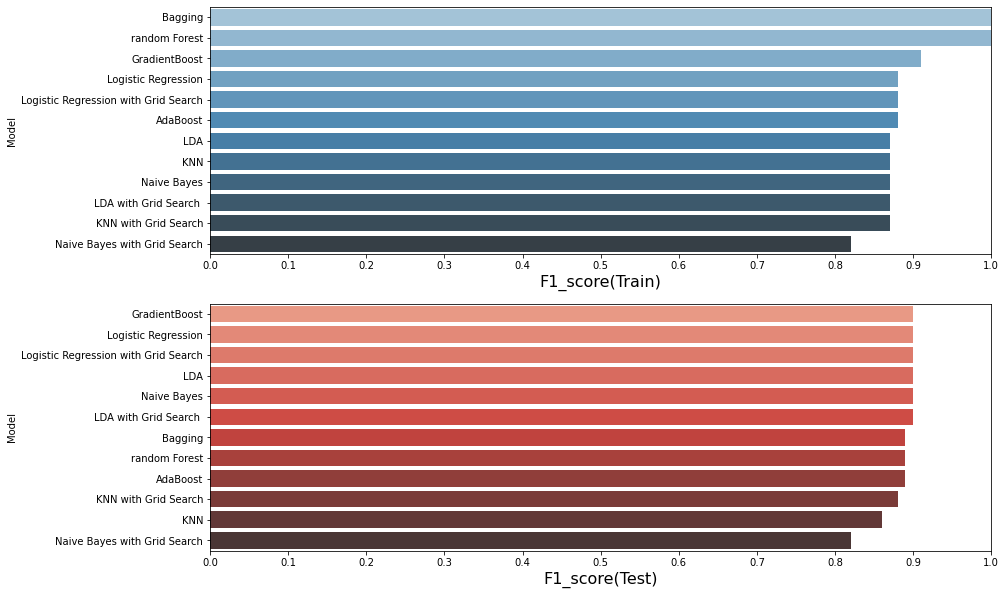

In [210]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['F1_score(Train)'], ascending=False, inplace=True)

sns.barplot(x='F1_score(Train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('F1_score(Train)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['F1_score(Test)'], ascending=False, inplace=True)

sns.barplot(x='F1_score(Test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('F1_score(Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Based on F1 score ensemble Gradient Boost Classifier model is performing very well on both train as well as test data. 

However both Logistic Regression without hyper-parameter tuning and with hyper-parameter tuning are performing well and equally with 86% model accuracy.


## Insights

- Blair supporters are more than double of Hague supporters across all aged eligible voters.
- More number of female voters voted for Labour party.
- Maximum number of young voters are Blair supporters having good political knowledge.
- Blair supporters gave an average rating for both current national economic condition as well as household condition.
- The analysis showing here is there are 88% chance that the Labour party wins the election with massive votes.
- With 92% accuracy this model can predict which party a voter will vote.